# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # braking into list city_weather_1 = city_weather["weather"][0]["description"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | espargos
City not found. Skipping...
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | chaoyang
Processing Record 6 of Set 1 | calvinia
Processing Record 7 of Set 1 | rio gallegos
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | kargasok
Processing Record 16 of Set 1 | hermosillo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | port-aux-francais
Pr

Processing Record 39 of Set 4 | lisala
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | kirakira
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | osceola
Processing Record 44 of Set 4 | dudinka
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | larache
Processing Record 49 of Set 4 | lihue
Processing Record 0 of Set 5 | prince rupert
Processing Record 1 of Set 5 | lushun
Processing Record 2 of Set 5 | lewiston orchards
Processing Record 3 of Set 5 | floro
Processing Record 4 of Set 5 | san pedro
Processing Record 5 of Set 5 | oodweyne
Processing Record 6 of Set 5 | tidjikja
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | grand forks
Processing Record 9 of Set 5 | pimentel
Processing Record 10 of Set 5 | balakhta
Processing Record 11 of Set 5 | ghadamis
Processing Record 12 of Set 5 | petropavlovsk-kamchatsky
Pr

Processing Record 31 of Set 8 | hithadhoo
Processing Record 32 of Set 8 | lakota
Processing Record 33 of Set 8 | bardai
Processing Record 34 of Set 8 | quelimane
Processing Record 35 of Set 8 | la trinite
Processing Record 36 of Set 8 | sibi
Processing Record 37 of Set 8 | roanoke
Processing Record 38 of Set 8 | caraubas
Processing Record 39 of Set 8 | roma
Processing Record 40 of Set 8 | huanta
Processing Record 41 of Set 8 | kete krachi
Processing Record 42 of Set 8 | singaraja
Processing Record 43 of Set 8 | alesund
Processing Record 44 of Set 8 | laurel bay
Processing Record 45 of Set 8 | ta`u
Processing Record 46 of Set 8 | vorkuta
Processing Record 47 of Set 8 | shaowu
Processing Record 48 of Set 8 | borovskoy
Processing Record 49 of Set 8 | valle de bravo
Processing Record 0 of Set 9 | bathsheba
Processing Record 1 of Set 9 | lubao
Processing Record 2 of Set 9 | seguela
Processing Record 3 of Set 9 | tanjung selor
City not found. Skipping...
Processing Record 4 of Set 9 | farkha

Processing Record 24 of Set 12 | notodden
Processing Record 25 of Set 12 | whangarei
Processing Record 26 of Set 12 | coaldale
Processing Record 27 of Set 12 | karibib
Processing Record 28 of Set 12 | trairi
Processing Record 29 of Set 12 | aral
Processing Record 30 of Set 12 | yemva
Processing Record 31 of Set 12 | umluj
Processing Record 32 of Set 12 | rio grande
Processing Record 33 of Set 12 | ulan bator
Processing Record 34 of Set 12 | akureyri
Processing Record 35 of Set 12 | essaouira
Processing Record 36 of Set 12 | zabol
Processing Record 37 of Set 12 | lukovit
Processing Record 38 of Set 12 | ingeniero jacobacci
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.08,83,99,6.92,GS,1701111159
1,punta arenas,-53.1500,-70.9167,15.01,47,0,5.14,CL,1701111159
2,hasaki,35.7333,140.8333,15.22,79,37,9.91,JP,1701111160
3,chaoyang,41.5703,120.4586,-7.42,42,0,2.25,CN,1701111160
4,calvinia,-31.4707,19.7760,24.76,17,4,2.55,ZA,1701111160


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.08,83,99,6.92,GS,1701111159
1,punta arenas,-53.1500,-70.9167,15.01,47,0,5.14,CL,1701111159
2,hasaki,35.7333,140.8333,15.22,79,37,9.91,JP,1701111160
3,chaoyang,41.5703,120.4586,-7.42,42,0,2.25,CN,1701111160
4,calvinia,-31.4707,19.7760,24.76,17,4,2.55,ZA,1701111160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

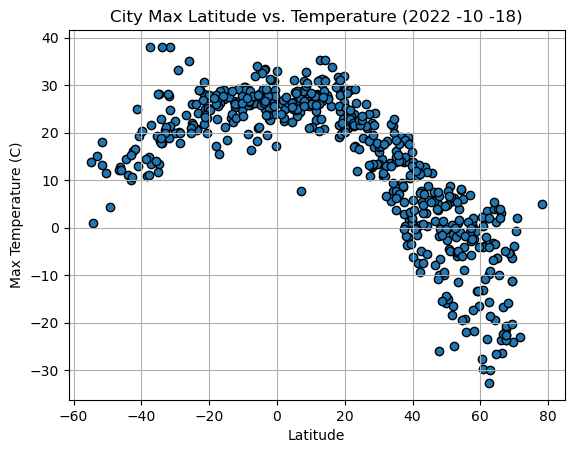

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022 -10 -18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

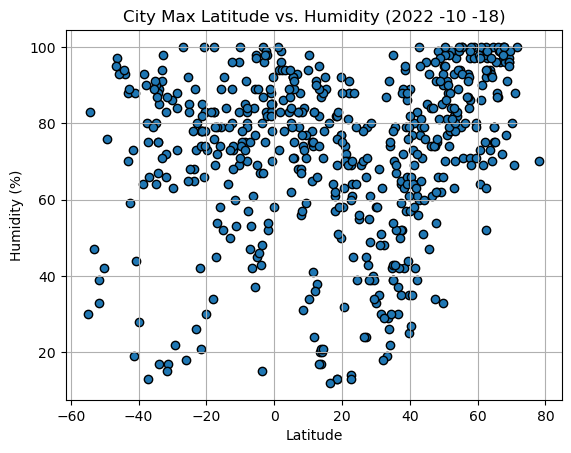

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

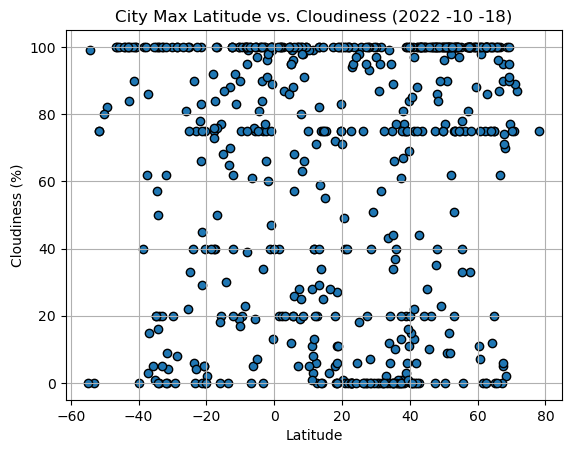

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

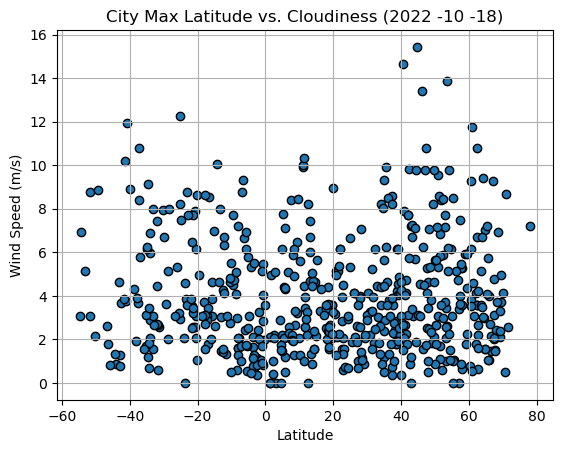

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022 -10 -18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
from scipy import stats
def lin_regress(x, y):
    correlation = stats.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, correlation
print(lin_regress)

<function lin_regress at 0x00000205436D30A0>


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hasaki,35.7333,140.8333,15.22,79,37,9.91,JP,1701111160
3,chaoyang,41.5703,120.4586,-7.42,42,0,2.25,CN,1701111160
6,georgetown,5.4112,100.3354,26.12,92,20,2.06,MY,1701111160
8,bethel,41.3712,-73.4140,11.41,64,75,4.12,US,1701111160
9,tiksi,71.6872,128.8694,-23.10,100,87,2.57,RU,1701111161


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.08,83,99,6.92,GS,1701111159
1,punta arenas,-53.1500,-70.9167,15.01,47,0,5.14,CL,1701111159
4,calvinia,-31.4707,19.7760,24.76,17,4,2.55,ZA,1701111160
5,rio gallegos,-51.6226,-69.2181,18.03,39,75,8.75,AR,1701111160
7,puerto natales,-51.7236,-72.4875,13.25,33,75,3.09,CL,1701111089


###  Temperature vs. Latitude Linear Regression Plot

The R value is: -0.8718180226019443


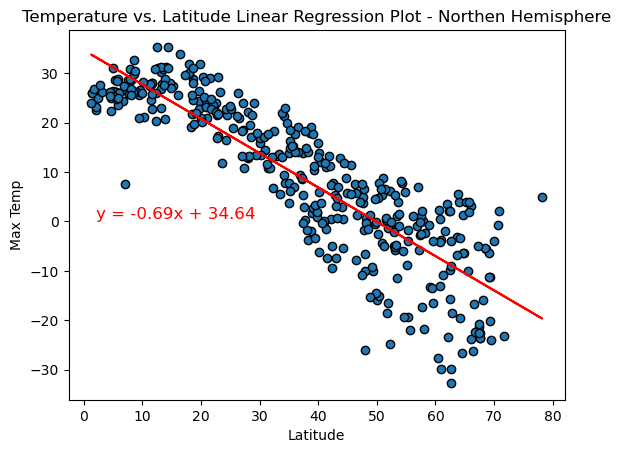

In [41]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (2, 0.5), color = "red", fontsize = 12)

#Formatting
plt.title("Temperature vs. Latitude Linear Regression Plot - Northen Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig5.png")

print("The R value is:", r_value[0])

The R value is: 0.6237381322699549


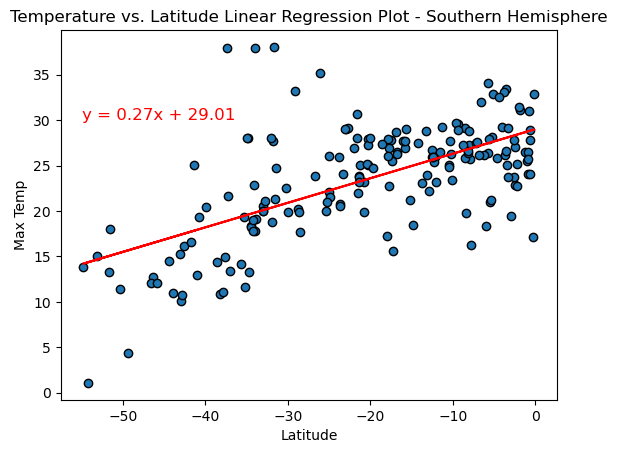

In [40]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-55, 30), color = "red", fontsize = 12)

#Formatting
plt.title("Temperature vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig6.png")

print("The R value is:", r_value[0])

**Discussion about the linear relationship: 

Northen hemisphere appears to show a strong negative correlation with a strong relationship with its variables. Firstly, it has an R-Value of -0.87 (to 2 d.p.) showing a very strong negative correlation. Then if we look at the chart itself it has very dense clumps of points near our regression line in a strong looking negative correlation proving the good negative correlation. The slope also helps show what you would expect from the data; the further north you go the colder it gets. With a slope of -0.69 this shows that as you go up the x-axis (go further up north) the y-axis will decrease at a fair rate (get colder).

The southern hemisphere is showing the opposite of what is being depicted in the northern hemisphere with every aspect showing a weaker positive correlation. As with northern hemisphere the plot points do clump fairly close to our regression line indicating good correlation. The points do seem to be more spread out then with northern, but this could be down to sample sizes. Again, as with northern the southern hemisphere has a good R-Vale of 0.62 (to 2 d.p.). This isn't as strong as northerns R-Value but still shows and proves a healthy positive correlation. 

Overall, I feel like the regressions used show that these are good variables to compare to each other as they prove the point you would expect of as you go further north or south on the globe the colder it gets, and the hottest points being closer to the equator. A good relation between the variables can be seen by these charts.

### Humidity vs. Latitude Linear Regression Plot

The R value is: 0.306682567584599


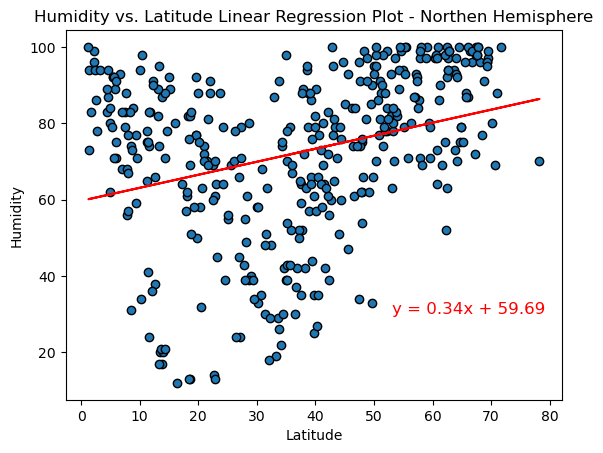

In [37]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (53, 30), color = "red", fontsize = 12)

#Formatting
plt.title("Humidity vs. Latitude Linear Regression Plot - Northen Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig7.png")

print("The R value is:", r_value[0])

The R value is: 0.12198948637932025


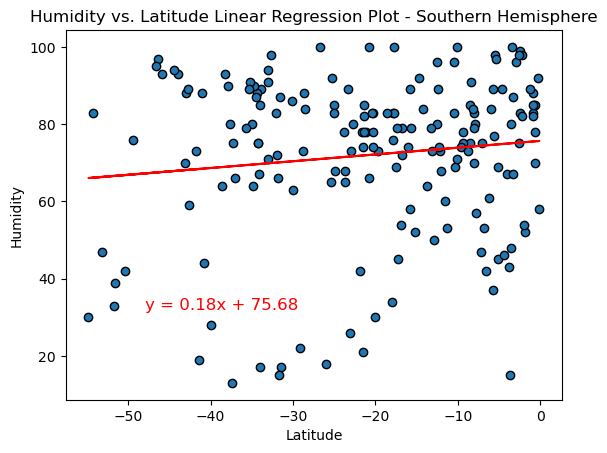

In [39]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-48, 32), color = "red", fontsize = 12)

#Formatting
plt.title("Humidity vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig8.png")

print("The R value is:", r_value[0])

**Discussion about the linear relationship:

These sets of graphs show somethings we can take away but not much. 

First, we will look at the northern hemisphere. The chart does show some clumping around the regression line but not as much as other charts within this report do, this does help show some positive correlation, but it is weak correlation. This can be further proven by the data having an R-Value of 0.31 (to 2 d.p.). This R-Value does show some positive correlation but proves the point of it being weak. Finally with the slope at 0.34 this further helps prove the correlation is weak by virtue of the slope value showing a minimal increase in humidity as latitude increases. 

Looking at the southern hemisphere we see as we have with northern hemisphere but much, much weaker. There are bare minimal clumps around the regression line showing the data to have no real correlation even with the regression line showing faint signs of positive correlation. This backed up by an R-Value of 0.12 (to 2 d.p.) and a slope value of 0.18 does technically prove some positive correlation but I would say no real correlation can be obtained from this chart as it is too sporadic. 

Overall, I feel these charts show that these are not good variables to compare to each other and show that not necessarily does going further towards the poles of the earth does humidity increase. All that you can take from these charts in my opinion is that they show the closer to the equator you go the more humid it will get, however, to prove this more data sets will need to be ran and charts plotted.

### Cloudiness vs. Latitude Linear Regression Plot

The R value is: 0.18916330438879442


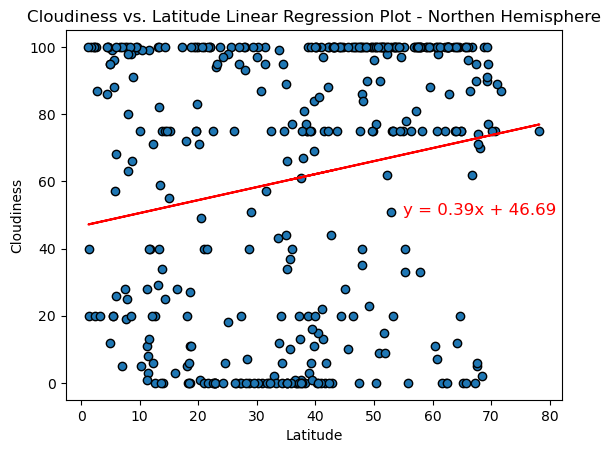

In [35]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (55, 50), color = "red", fontsize = 12)

#Formatting
plt.title("Cloudiness vs. Latitude Linear Regression Plot - Northen Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig9.png")

print("The R value is:", r_value[0])

The R value is: 0.10546341652847416


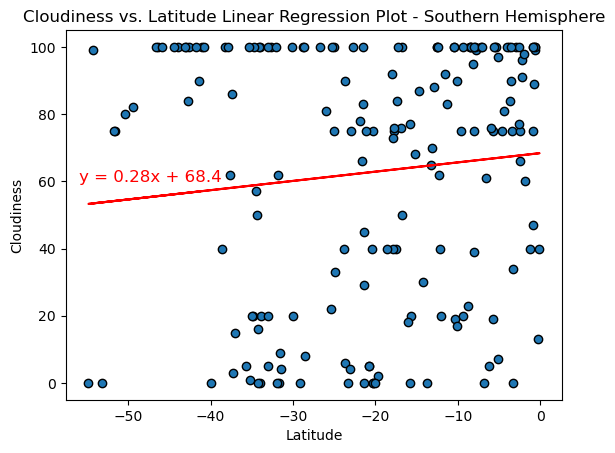

In [29]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-56, 60), color = "red", fontsize = 12)

#Formatting
plt.title("Cloudiness vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig10.png")

print("The R value is:", r_value[0])

**Discussion about the linear relationship:

Not much can be found from these charts. Both charts categorically show that there is no correlation between these two variables. With both showing no signs of clumping around their regression lines, weak R-Values of 0.19 (to 2 d.p.) for northern hemisphere and 0.11 (to 2 d.p.) for southern hemisphere and poor slope values; all this leading to show there is no real correlation between latitude and wind speed. This showing that there is no link between these two variables and that they cannot be compared to each other to show any real trend or relation to each other.

### Wind Speed vs. Latitude Linear Regression Plot

The R value is: 0.131284919444111


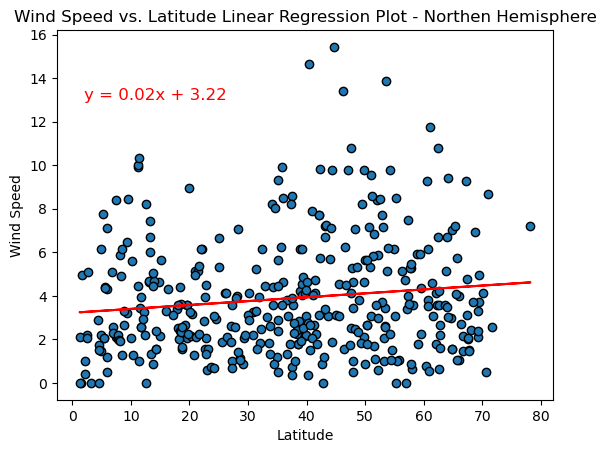

In [33]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (2, 13), color = "red", fontsize = 12)

#Formatting
plt.title("Wind Speed vs. Latitude Linear Regression Plot - Northen Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig11.png")

print("The R value is:", r_value[0])

The R value is: -0.22602622416843504


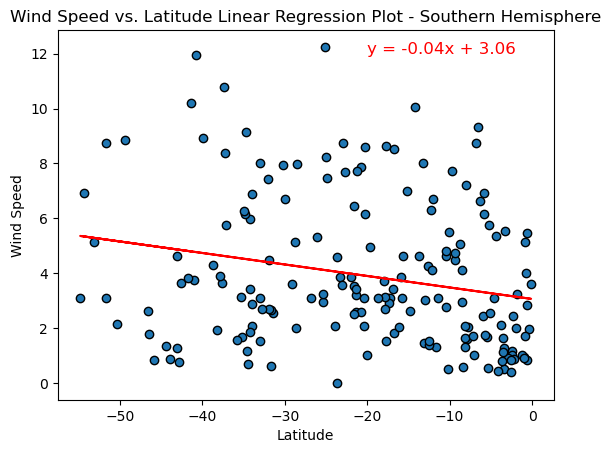

In [34]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black")
lin_r, lin_r_eq, r_value = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], lin_r, color = "red")
plt.annotate(lin_r_eq, (-20, 12), color = "red", fontsize = 12)

#Formatting
plt.title("Wind Speed vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#I have saved all the regression charts as well incase there is an error in uploading for evidence
plt.savefig("output_data/Fig12.png")

print("The R value is:", r_value[0])

**Discussion about the linear relationship:

Finally, we can see a few similar things with the last two charts showing wind speed vs latitude as we have seen above with cloudiness vs latitude.

The northern hemispheres chart shows firstly the weakest slope we have seen so far. At 0.02 this shows absolute minimal increase in wind speed as latitude increases and no real positive or negative correlation. This point can be backed up by the low R-Value of 0.13 (to 2 d.p.), Further proving no correlation can be obtained. Also, with bare minimum clumping around the line and majority of the clumps being below the line this shows that no real connection can be formed by this data. 

This can be further proven by looking at the southern hemisphere. A slope of -0.04 and an R-Value of -0.23 (to 2 d.p.) and near non-existent clumping around the line this shows as with the northern hemisphere that no real correlation is present and that no real connection can be formed between these 2 variables.